# DBSCAN Implementation and Benchmark

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import MinMaxScaler
from collections import Counter

In [2]:
class DBSCAN:
    def __init__(self, eps=1, min_samples=1):
        self.eps = eps
        self.min_samples = min_samples
        self.labels = None

    def fit(self, X):
        self.labels = np.zeros(len(X), dtype=int)
        cluster_id = 0

        for i, point in enumerate(X):

            # Skipging assigned cluster numbers
            if self.labels[i] != 0:
                continue
            
            # Finding neighbors withini the range of the selected points
            neighbors = self._get_neighbors(X, point)

            # Considering points with few neighbors as Noise Points
            if len(neighbors) < self.min_samples:
                self.labels[i] = -1  # Noise point

            # Expanding the cluster
            else:
                cluster_id += 1
                self._expand_cluster(X, i, neighbors, cluster_id)

    def _get_neighbors(self, X, point):
        distances = euclidean_distances([point], X)[0]
        return np.where(distances <= self.eps)[0]

    def _expand_cluster(self, X, point_index, neighbors, cluster_id):
        self.labels[point_index] = cluster_id

        i = 0
        while i < len(neighbors):

            current_point = neighbors[i]
            
            if self.labels[current_point] == -1:
                self.labels[current_point] = cluster_id  # Changing noise point to border point
            
            elif self.labels[current_point] == 0:
            
                self.labels[current_point] = cluster_id    
                current_neighbors = self._get_neighbors(X, X[current_point])
                
                if len(current_neighbors) >= self.min_samples:
                    neighbors = np.concatenate((neighbors, current_neighbors))

            i += 1

    def get_labels(self):
        return self.labels

In [3]:
col_names = ["feature1", "feature2", "label"]

data_compound = pd.read_csv("./Compound.txt", delimiter="\t", names=col_names)
data_d31 = pd.read_csv("./D31.txt", delimiter="\t", names=col_names)
data_pathbased = pd.read_csv("./pathbased.txt", delimiter="\t", names=col_names)
data_spiral = pd.read_csv("./spiral.txt", delimiter="\t", names=col_names)

print(f"Compound dataset shape: {data_compound.shape}")
print(f"D31 dataset shape: {data_d31.shape}")
print(f"Pathbased dataset shape: {data_pathbased.shape}")
print(f"Spiral dataset shape: {data_spiral.shape}")

Compound dataset shape: (399, 3)
D31 dataset shape: (3100, 3)
Pathbased dataset shape: (300, 3)
Spiral dataset shape: (312, 3)


In [4]:
X_compound = data_compound.iloc[:,:-1]
X_d31 = data_d31.iloc[:,:-1]
X_pathbased = data_pathbased.iloc[:,:-1]
X_spiral = data_spiral.iloc[:,:-1]

### Applying DBSCAN on different datasets

this section applies the implemented DBSCAN algorithm to the given datasets and then compares the results with the real data labels

#### Compound Dataset

Text(0, 0.5, 'feature 2')

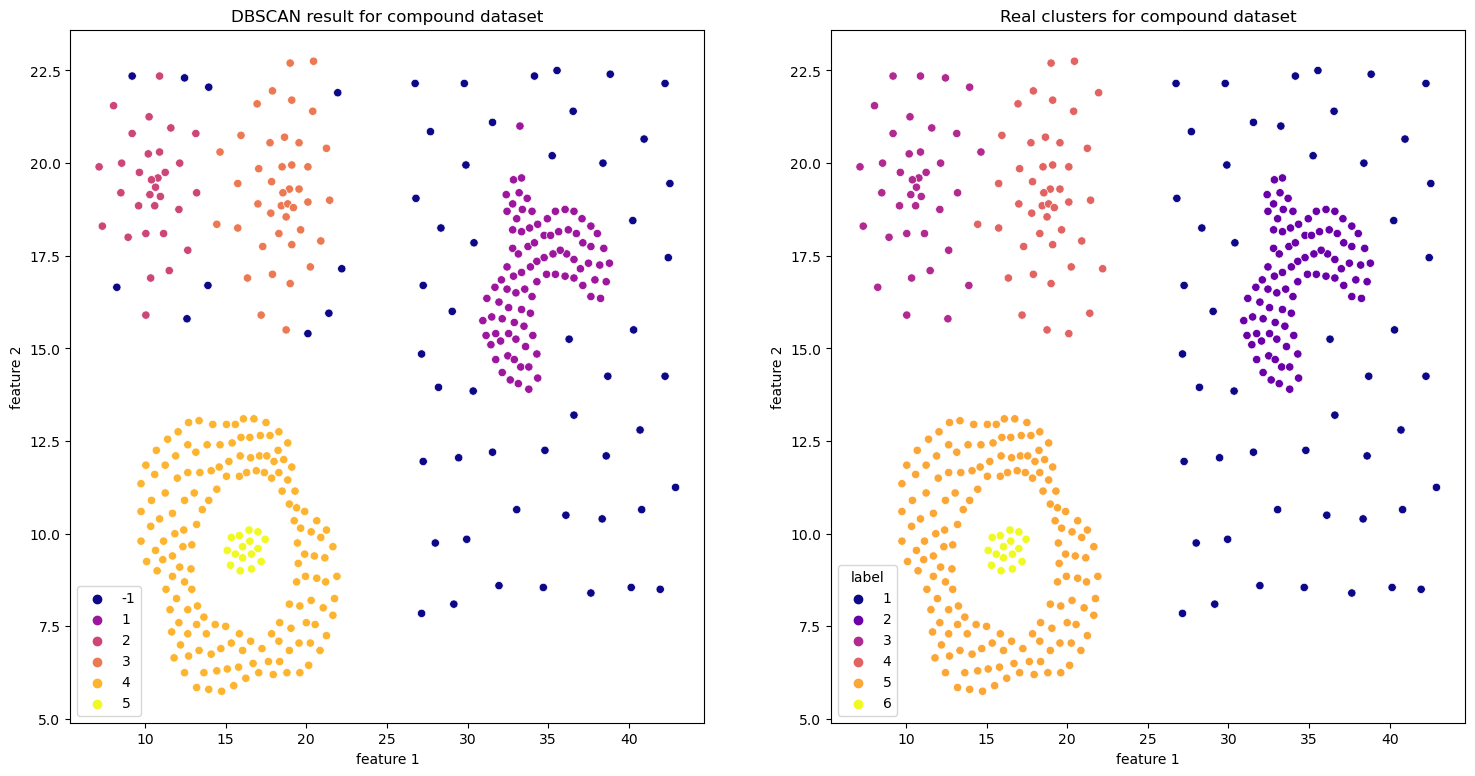

In [5]:
dbs = DBSCAN(eps=1.5, min_samples=5)

dbs.fit(X_compound.to_numpy())

compound_labels = dbs.get_labels()

fig, axes = plt.subplots(1, 2, figsize=(18,9))

sns.scatterplot(x=X_compound.iloc[:,0], y=X_compound.iloc[:,1], ax=axes[0], hue=compound_labels, palette="plasma")
axes[0].set_title('DBSCAN result for compound dataset')
axes[0].set_xlabel("feature 1")
axes[0].set_ylabel("feature 2")

sns.scatterplot(x=X_compound.iloc[:,0], y=X_compound.iloc[:,1], ax=axes[1], hue=data_compound["label"], palette="plasma")
axes[1].set_title('Real clusters for compound dataset')
axes[1].set_xlabel("feature 1")
axes[1].set_ylabel("feature 2")

#### D31 Dataset

Text(0, 0.5, 'feature 2')

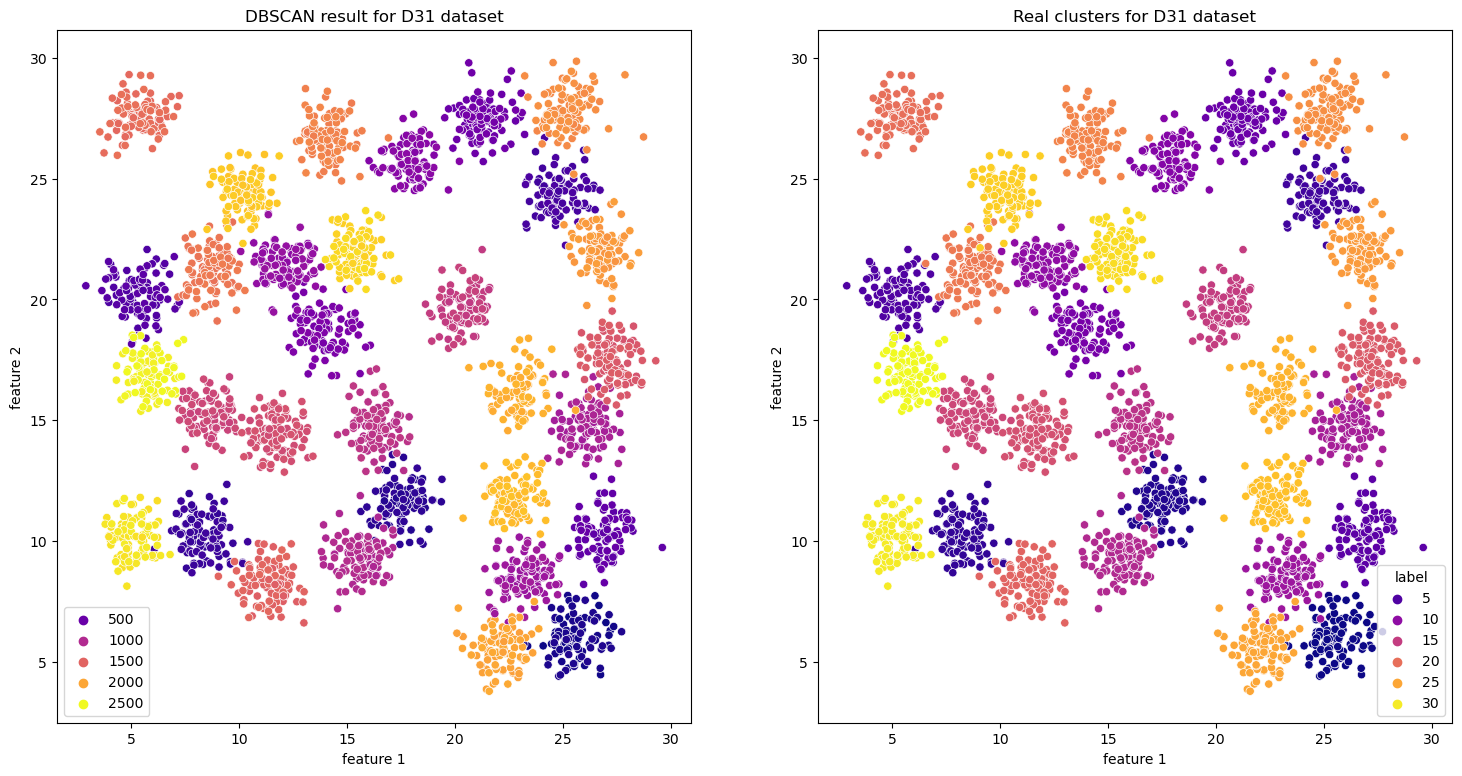

In [6]:
dbs = DBSCAN(eps=0.1, min_samples=1)

dbs.fit(X_d31.to_numpy())

d31_labels = dbs.get_labels()

fig, axes = plt.subplots(1, 2, figsize=(18,9))

sns.scatterplot(x=X_d31.iloc[:,0], y=X_d31.iloc[:,1], ax=axes[0], hue=d31_labels, palette="plasma")
axes[0].set_title('DBSCAN result for D31 dataset')
axes[0].set_xlabel("feature 1")
axes[0].set_ylabel("feature 2")

sns.scatterplot(x=X_d31.iloc[:,0], y=X_d31.iloc[:,1], ax=axes[1], hue=data_d31["label"], palette="plasma")
axes[1].set_title('Real clusters for D31 dataset')
axes[1].set_xlabel("feature 1")
axes[1].set_ylabel("feature 2")

#### Pathbased dataset

Text(0, 0.5, 'feature 2')

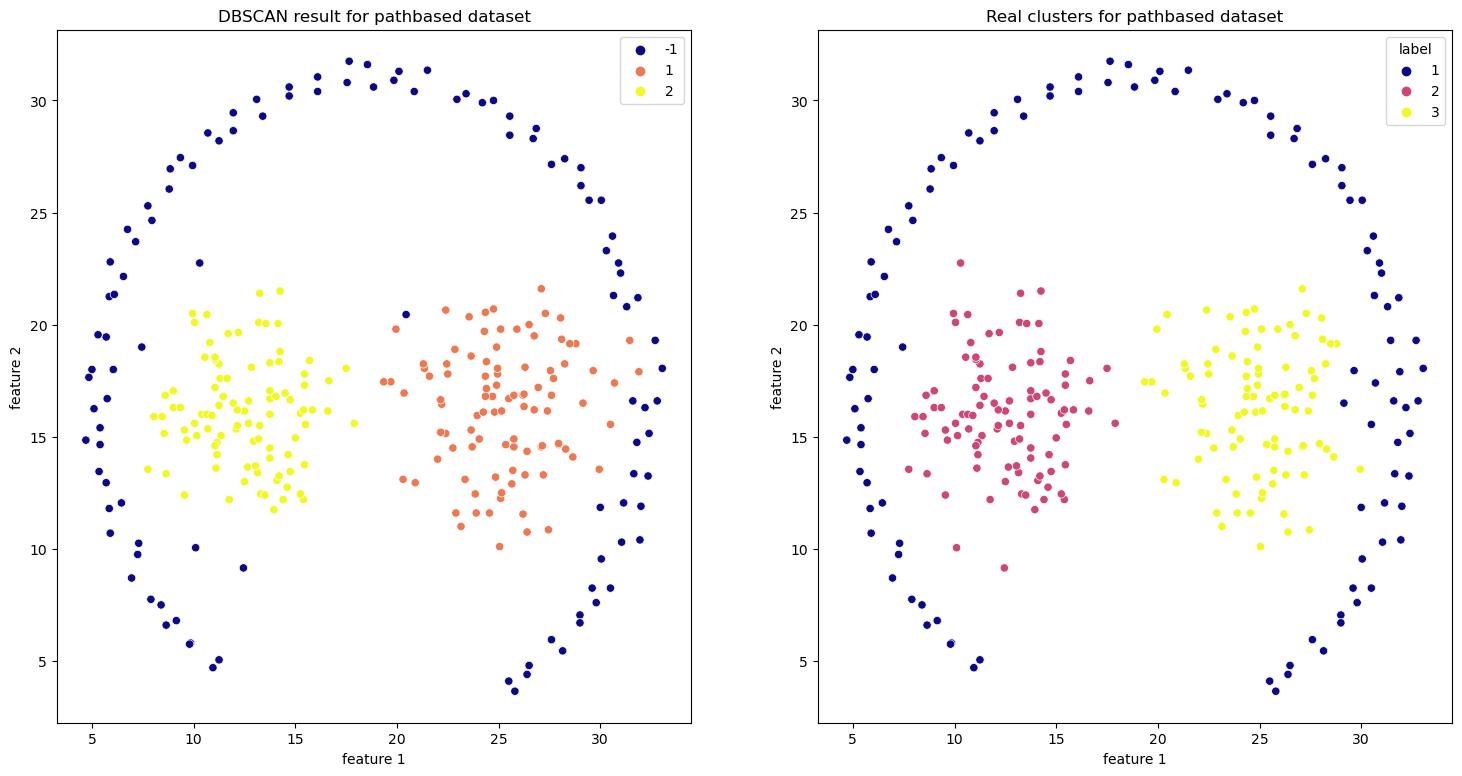

In [7]:
dbs = DBSCAN(eps=2.3, min_samples=10)

dbs.fit(X_pathbased.to_numpy())

pathbased_labels = dbs.get_labels()

fig, axes = plt.subplots(1, 2, figsize=(18,9))

sns.scatterplot(x=X_pathbased.iloc[:,0], y=X_pathbased.iloc[:,1], ax=axes[0], hue=pathbased_labels, palette="plasma")
axes[0].set_title('DBSCAN result for pathbased dataset')
axes[0].set_xlabel("feature 1")
axes[0].set_ylabel("feature 2")

sns.scatterplot(x=X_pathbased.iloc[:,0], y=X_pathbased.iloc[:,1], ax=axes[1], hue=data_pathbased["label"], palette="plasma")
axes[1].set_title('Real clusters for pathbased dataset')
axes[1].set_xlabel("feature 1")
axes[1].set_ylabel("feature 2")

#### Spiral dataset

Text(0, 0.5, 'feature 2')

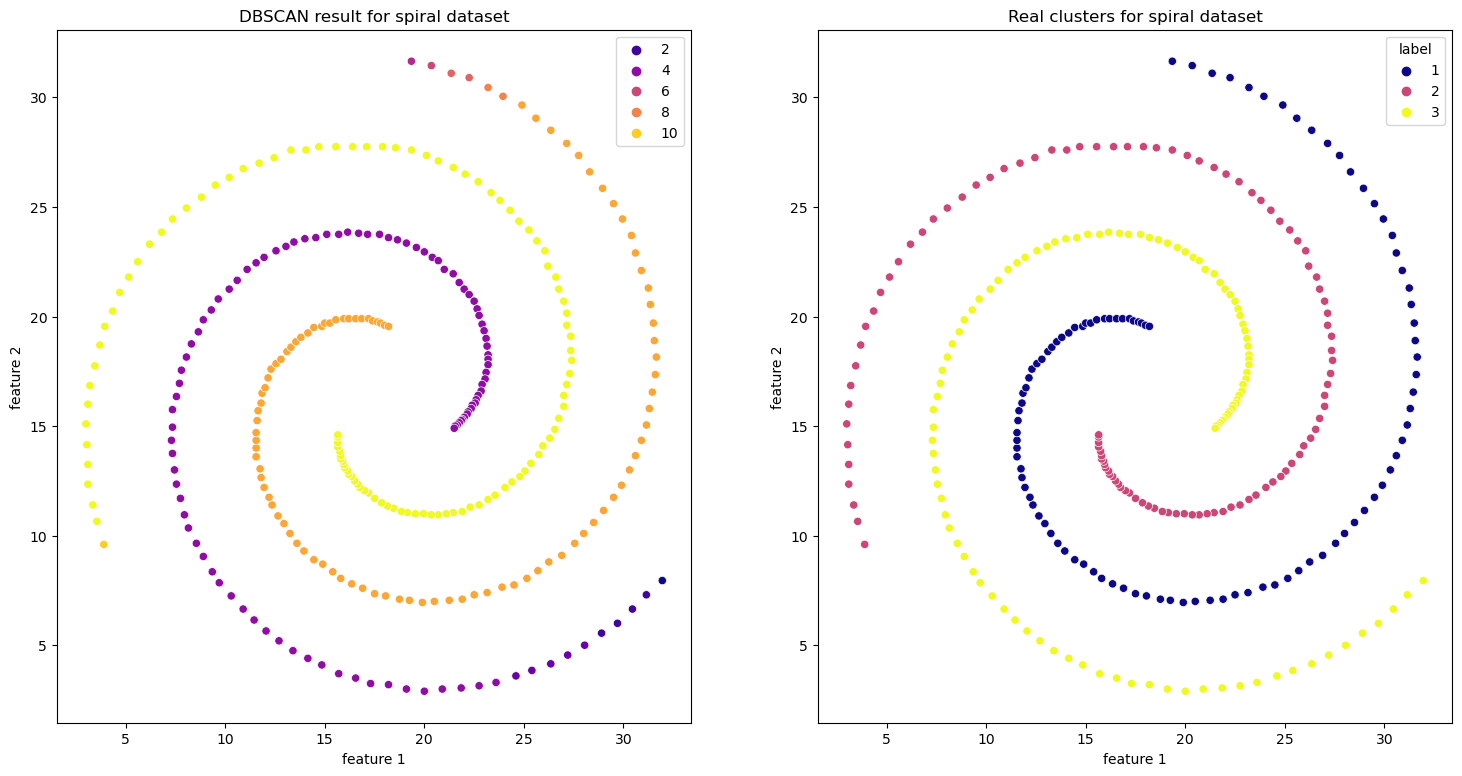

In [8]:
dbs = DBSCAN(eps=1, min_samples=1)

dbs.fit(X_spiral.to_numpy())

spiral_labels = dbs.get_labels()

fig, axes = plt.subplots(1, 2, figsize=(18,9))

sns.scatterplot(x=X_spiral.iloc[:,0], y=X_spiral.iloc[:,1], ax=axes[0], hue=spiral_labels, palette="plasma")
axes[0].set_title('DBSCAN result for spiral dataset')
axes[0].set_xlabel("feature 1")
axes[0].set_ylabel("feature 2")

sns.scatterplot(x=X_spiral.iloc[:,0], y=X_spiral.iloc[:,1], ax=axes[1], hue=data_spiral["label"], palette="plasma")
axes[1].set_title('Real clusters for spiral dataset')
axes[1].set_xlabel("feature 1")
axes[1].set_ylabel("feature 2")

### Purity Calculation

In [9]:
def calculate_purity(labels, clusters):
    n = len(labels)
    unique_clusters = set(clusters)
    total_purity = 0

    for cluster in unique_clusters:
        cluster_indices = [i for i, c in enumerate(clusters) if c == cluster]
        cluster_labels = [labels[i] for i in cluster_indices]
        label_counts = Counter(cluster_labels)
        
        majority_count = max(label_counts.values())
        cluster_purity = majority_count / len(cluster_labels)
        total_purity += cluster_purity * len(cluster_labels)
    
    purity = total_purity / n
    return purity

In [10]:
compound_purity = calculate_purity(labels=data_compound["label"], clusters=compound_labels)
d31_purity = calculate_purity(labels=data_d31["label"], clusters=d31_labels)
pathbased_purity = calculate_purity(labels=data_pathbased["label"], clusters=pathbased_labels)
spiral_purity = calculate_purity(labels=data_spiral["label"], clusters=spiral_labels)

print(f"Purity for compound dataset: {compound_purity:.4f}")
print(f"Purity for D31 dataset: {d31_purity:.4f}")
print(f"Purity for pathbased dataset: {pathbased_purity:.4f}")
print(f"Purity for spiral dataset: {spiral_purity:.4f}")

Purity for compound dataset: 0.9699
Purity for D31 dataset: 0.9974
Purity for pathbased dataset: 0.9667
Purity for spiral dataset: 1.0000
